Data Set Link: https://archive.ics.uci.edu/dataset/502/online+retail+ii

In [ ]:
import pandas as pd

# Replace 'your_dataset.xlsx' with the actual path to your Excel file.
file_path = 'online_retail_II.xlsx'

# Read data from the two sheets.
df_2009_2010 = pd.read_excel(file_path, sheet_name='Year 2009-2010',nrows=1000)
df_2010_2011 = pd.read_excel(file_path, sheet_name='Year 2010-2011',nrows=1000)

In [ ]:
# Add a new column with references to the sheet names.
df_2009_2010['Sheet_Name'] = 2009
df_2010_2011['Sheet_Name'] = 2010

# Concatenate the two dataframes.
combined_data = pd.concat([df_2009_2010, df_2010_2011])

# Now, 'combined_data' contains the data from both sheets with an additional 'Sheet_Name' column.
combined_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sheet_Name
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009


In [ ]:
# Check for Null Values
null_values = combined_data.isnull().sum()
null_values


Invoice        0
StockCode      0
Description    2
Quantity       0
InvoiceDate    0
Price          0
Customer ID    7
Country        0
Sheet_Name     0
dtype: int64

In [ ]:
combined_data = combined_data.drop('Customer ID', axis=1)
combined_data = combined_data.drop('Invoice', axis=1)

In [ ]:
combined_data = combined_data.drop('InvoiceDate', axis=1)
combined_data = combined_data.drop('StockCode', axis=1)

In [ ]:
combined_data=combined_data.dropna()

In [ ]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1998 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Description  1998 non-null   object 
 1   Quantity     1998 non-null   int64  
 2   Price        1998 non-null   float64
 3   Country      1998 non-null   object 
 4   Sheet_Name   1998 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 93.7+ KB


In [ ]:
combined_data.columns

Index(['Description', 'Quantity', 'Price', 'Country', 'Sheet_Name'], dtype='object')

In [ ]:
combined_data.head()

,Description,Quantity,Price,Country,Sheet_Name
0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,United Kingdom,2009
1,PINK CHERRY LIGHTS,12,6.75,United Kingdom,2009
2,WHITE CHERRY LIGHTS,12,6.75,United Kingdom,2009
3,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,United Kingdom,2009
4,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,United Kingdom,2009


In [ ]:
combined_data.head()

,Description,Quantity,Price,Country,Sheet_Name
0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,United Kingdom,2009
1,PINK CHERRY LIGHTS,12,6.75,United Kingdom,2009
2,WHITE CHERRY LIGHTS,12,6.75,United Kingdom,2009
3,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,United Kingdom,2009
4,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,United Kingdom,2009


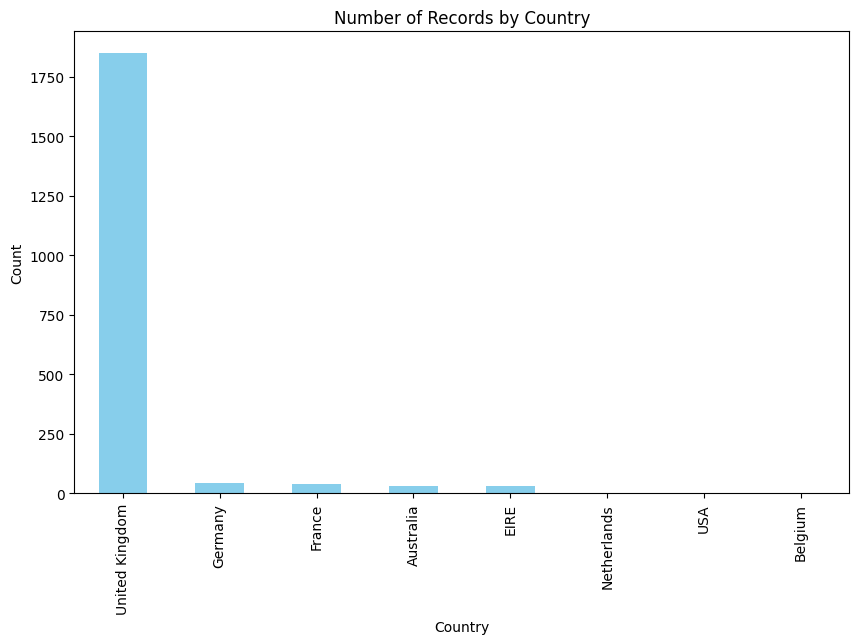

In [ ]:
import matplotlib.pyplot as plt

# Count the number of records for each country
country_counts = combined_data['Country'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Records by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

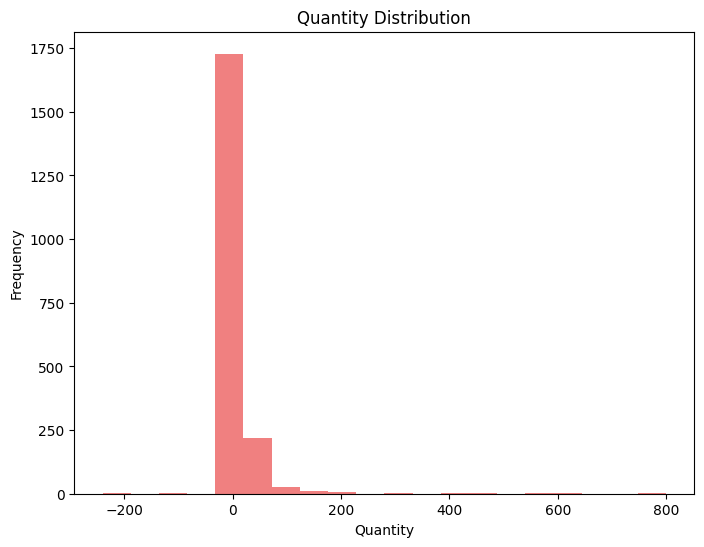

In [ ]:
# Create a histogram for the 'Quantity' column
plt.figure(figsize=(8, 6))
plt.hist(combined_data['Quantity'], bins=20, color='lightcoral')
plt.title('Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()


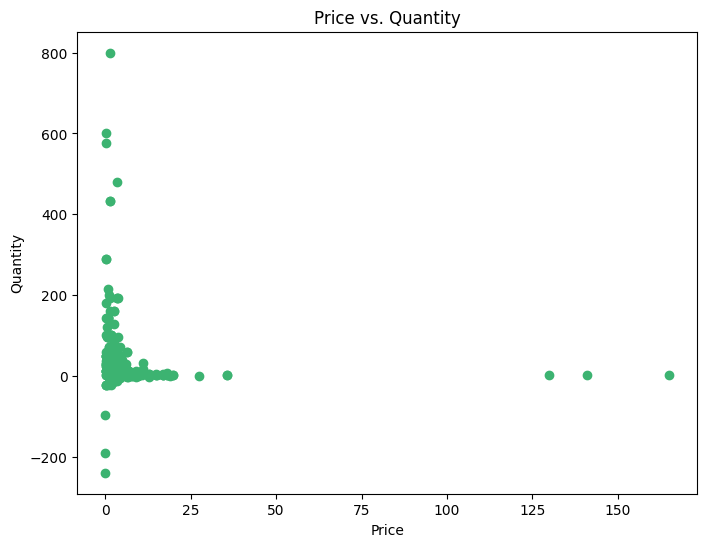

In [ ]:
# Create a scatter plot for 'Price' vs. 'Quantity'
plt.figure(figsize=(8, 6))
plt.scatter(combined_data['Price'], combined_data['Quantity'], color='mediumseagreen')
plt.title('Price vs. Quantity')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder



# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the non-numeric column
combined_data['Country'] = label_encoder.fit_transform(combined_data['Country'])
combined_data['Description'] = label_encoder.fit_transform(combined_data['Description'])
#combined_data['StockCode '] = label_encoder.fit_transform(combined_data['StockCode'])
# Print the DataFrame with the encoded column
print(combined_data)


     Description  Quantity  Price  Country  Sheet_Name
0             16        12   6.95        7        2009
1            643        12   6.75        7        2009
2              7        12   6.75        7        2009
3            708        48   2.10        7        2009
4            943        24   1.25        7        2009
..           ...       ...    ...      ...         ...
995          441         1   1.65        7        2010
996          908         1   1.25        7        2010
997          660         1   1.25        7        2010
998          595         1   2.55        7        2010
999          961         2   1.25        7        2010

[1998 rows x 5 columns]


In [ ]:
correlation_matrix = combined_data.corr()

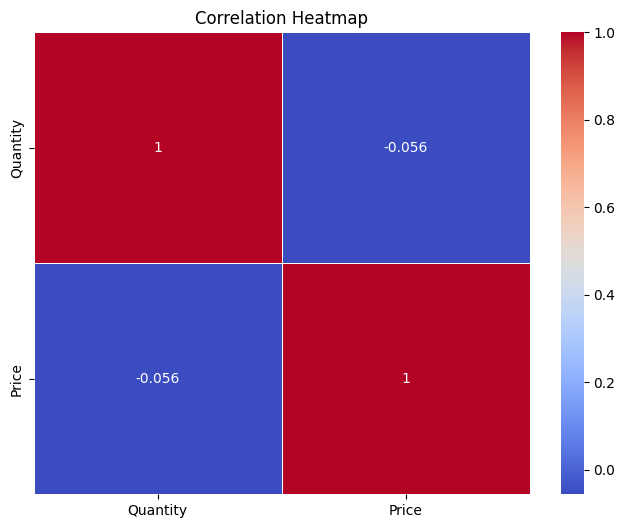

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numerical columns for the heatmap
numerical_data = combined_data[['Quantity', 'Price']]

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Assuming you have your data in a DataFrame called 'df'

# Select the numerical columns for clustering
data = combined_data[['Quantity', 'Price']]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Create clusters using K-Means
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(data_scaled)

# Evaluate K-Means using Silhouette Score
kmeans_silhouette = silhouette_score(data_scaled, kmeans_labels)

# Evaluate K-Means using Davies-Bouldin Index
kmeans_davies_bouldin = davies_bouldin_score(data_scaled, kmeans_labels)

# Evaluate K-Means using Calinski-Harabasz Index
kmeans_calinski_harabasz = calinski_harabasz_score(data_scaled, kmeans_labels)

print("K-Means - Silhouette Score:", kmeans_silhouette)
print("K-Means - Davies-Bouldin Index:", kmeans_davies_bouldin)
print("K-Means - Calinski-Harabasz Index:", kmeans_calinski_harabasz)


K-Means - Silhouette Score: 0.9428474010342437
K-Means - Davies-Bouldin Index: 0.27512883113663733
K-Means - Calinski-Harabasz Index: 2360.806988832251


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Assuming you have your data in a DataFrame called 'df'

# Select the numerical columns for clustering
data = combined_data[['Quantity', 'Price']]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Create clusters using Agglomerative Hierarchical Clustering
agglomerative = AgglomerativeClustering(n_clusters=3)
agg_labels = agglomerative.fit_predict(data_scaled)

# Evaluate Agglomerative using Silhouette Score
agg_silhouette = silhouette_score(data_scaled, agg_labels)

# Evaluate Agglomerative using Davies-Bouldin Index
agg_davies_bouldin = davies_bouldin_score(data_scaled, agg_labels)

# Evaluate Agglomerative using Calinski-Harabasz Index
agg_calinski_harabasz = calinski_harabasz_score(data_scaled, agg_labels)

print("Agglomerative - Silhouette Score:", agg_silhouette)
print("Agglomerative - Davies-Bouldin Index:", agg_davies_bouldin)
print("Agglomerative - Calinski-Harabasz Index:", agg_calinski_harabasz)


Agglomerative - Silhouette Score: 0.9492488778362451
Agglomerative - Davies-Bouldin Index: 0.2111253334304112
Agglomerative - Calinski-Harabasz Index: 2269.129119392649


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Assuming you have your data in a DataFrame called 'df'

# Select the numerical columns for clustering
data = combined_data[['Quantity', 'Price']]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Create clusters using DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)

# Evaluate DBSCAN using Silhouette Score
dbscan_silhouette = silhouette_score(data_scaled, dbscan_labels)

# DBSCAN does not have Davies-Bouldin and Calinski-Harabasz indices

print("DBSCAN - Silhouette Score:", dbscan_silhouette)


DBSCAN - Silhouette Score: 0.8174534858046612
